zIn this KNN model, the goal is to predict if a new patient's cancer result(0/1 in the class category) with 9 variables. 

we seperate training and test data just for cross validation

In [26]:
# before building the model
import pandas as pd 
df=pd.read_csv('/Users/hexiaoyu/Desktop/Courses/INSY- DATA MINING/cancer.csv')
df

,clump_thickness,cell_shape_uniformity,cell_size_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,4,1,1,3,2,1,3,1,1,0
2,2,1,2,1,2,1,3,1,1,0
3,2,1,1,1,2,1,1,1,5,0
4,4,2,1,1,2,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,8,10,10,10,6,10,10,10,10,1
695,7,8,8,7,3,10,7,2,3,1
696,5,10,10,10,4,10,5,6,3,1
697,8,4,5,1,2,0,7,3,1,1


In [27]:
df=df.dropna()

In [28]:
# construct variables and split data
X=df.iloc[:,0:9]
y=df['class']
from sklearn.model_selection import train_test_split
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [29]:
#standarize data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### KNN MODEL BUILDING

In [30]:
# Build a KNN model with k=3 using Euclidean distance function p=2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,p=2) 
model = knn.fit(scaled_X_train,y_train)
y_test_pred = model.predict(scaled_X_test)
y_test_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1])

In [31]:
# Make predictions and evaluate
from sklearn.metrics import recall_score
recall_knn = recall_score(y_test, y_test_pred)
recall_knn

np.float64(0.9342105263157895)

In [32]:
# Finding optimal K
for i in range(15, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(scaled_X_train, y_train)
    y_test_pred = model.predict(scaled_X_test)
    print("Recall score using k-NN with ", i, " neighbors = " + str(recall_score(y_test, y_test_pred)))

Recall score using k-NN with  15  neighbors = 0.9210526315789473
Recall score using k-NN with  16  neighbors = 0.8947368421052632
Recall score using k-NN with  17  neighbors = 0.9342105263157895
Recall score using k-NN with  18  neighbors = 0.9078947368421053
Recall score using k-NN with  19  neighbors = 0.9473684210526315
Recall score using k-NN with  20  neighbors = 0.8947368421052632
Recall score using k-NN with  21  neighbors = 0.9210526315789473
Recall score using k-NN with  22  neighbors = 0.9078947368421053
Recall score using k-NN with  23  neighbors = 0.9210526315789473
Recall score using k-NN with  24  neighbors = 0.8947368421052632


### make prediction with new patient data with optimal k

In [33]:
# Create a new observation and make prediction on the new observation using the model with optimal k
new_obs = [[4,2,1,1,1,8,3,1,1]]
scaled_new_obs = scaler.transform(new_obs)
knn = KNeighborsClassifier(n_neighbors=19)
model = knn.fit(scaled_X_train,y_train)
y_new= model.predict(scaled_new_obs)
y_new

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [34]:
model.predict_proba(scaled_new_obs)

array([[0.89473684, 0.10526316]])

In conclusion, the model predict that new patient has 89% chance of not having cancer. but still have 11% chance of having cancer

# Comparasion Session

conclusion:

knn:
class 0, recall 0.94 (k=19)

classification decision tree: class 1, recall 0.84 (after cross validation) |  wrong? usually happened? any other ways to consider? 

Random forest: class 0, recall 0.89


In [35]:
# build a decision tree model to classify the path of getting cancer or not 
# Build a tree model with 3 layers
from sklearn.tree import DecisionTreeClassifier
ct = DecisionTreeClassifier(max_depth=3)
model_ct = ct.fit(X_train, y_train)
ct_test_pred = model_ct.predict(X_test)
from sklearn.metrics import recall_score
recall_ct = recall_score(y_test, ct_test_pred)


In [36]:
recall_ct

np.float64(0.9342105263157895)

In [37]:
import numpy as np
# find the optimal depth of the tree
from sklearn.model_selection import cross_validate

for i in range (2,21):
    model = DecisionTreeClassifier(max_depth=i)
    scores = cross_validate(model_ct, X, y, scoring='recall', cv=5)
    print(i,':',np.average(scores['test_score']))

2 : 0.8380102040816325
3 : 0.8380102040816325
4 : 0.8380102040816325
5 : 0.8421768707482993
6 : 0.8380102040816325
7 : 0.8380102040816325
8 : 0.8380102040816325
9 : 0.8421768707482993
10 : 0.8380102040816325
11 : 0.8380102040816325
12 : 0.8421768707482993
13 : 0.8421768707482993
14 : 0.8421768707482993
15 : 0.8421768707482993
16 : 0.8421768707482993
17 : 0.8380102040816325
18 : 0.8380102040816325
19 : 0.8380102040816325
20 : 0.8421768707482993


In [38]:
#make prediction with max_depth =11 
# ct = DecisionTreeClassifier(max_depth=11)
# model_ct = ct.fit(X_train, y_train)
# ct_test_pred = model_ct.predict(X_test)
pred_ct_new=model_ct.predict(new_obs)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [39]:
pred_ct_new

array([1])

In [40]:
# Display feature importance
feature_importance = pd.Series(model_ct.feature_importances_, index=X_train.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

cell_shape_uniformity          0.819740
bare_nuclei                    0.127105
clump_thickness                0.039940
single_epithelial_cell_size    0.012910
normal_nucleoli                0.000305
cell_size_uniformity           0.000000
marginal_adhesion              0.000000
bland_chromatin                0.000000
mitoses                        0.000000
dtype: float64


In [41]:
# inteprting the rules and result 
from sklearn.tree import export_text
tree_rules = export_text(model_ct, feature_names=list(X_train.columns))
print(tree_rules)

|--- cell_shape_uniformity <= 3.50
|   |--- bare_nuclei <= 5.50
|   |   |--- clump_thickness <= 6.50
|   |   |   |--- class: 0
|   |   |--- clump_thickness >  6.50
|   |   |   |--- class: 1
|   |--- bare_nuclei >  5.50
|   |   |--- clump_thickness <= 2.00
|   |   |   |--- class: 0
|   |   |--- clump_thickness >  2.00
|   |   |   |--- class: 1
|--- cell_shape_uniformity >  3.50
|   |--- cell_shape_uniformity <= 4.50
|   |   |--- single_epithelial_cell_size <= 6.50
|   |   |   |--- class: 1
|   |   |--- single_epithelial_cell_size >  6.50
|   |   |   |--- class: 0
|   |--- cell_shape_uniformity >  4.50
|   |   |--- normal_nucleoli <= 2.50
|   |   |   |--- class: 1
|   |   |--- normal_nucleoli >  2.50
|   |   |   |--- class: 1



## Random forest

In [42]:
# random forest 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)
model_rf= rf.fit(X_train, y_train)
y_test_pred= model_rf.predict(X_test)
recall_rf= recall_score(y_test, y_test_pred)
recall_rf

np.float64(0.9736842105263158)

<Axes: >

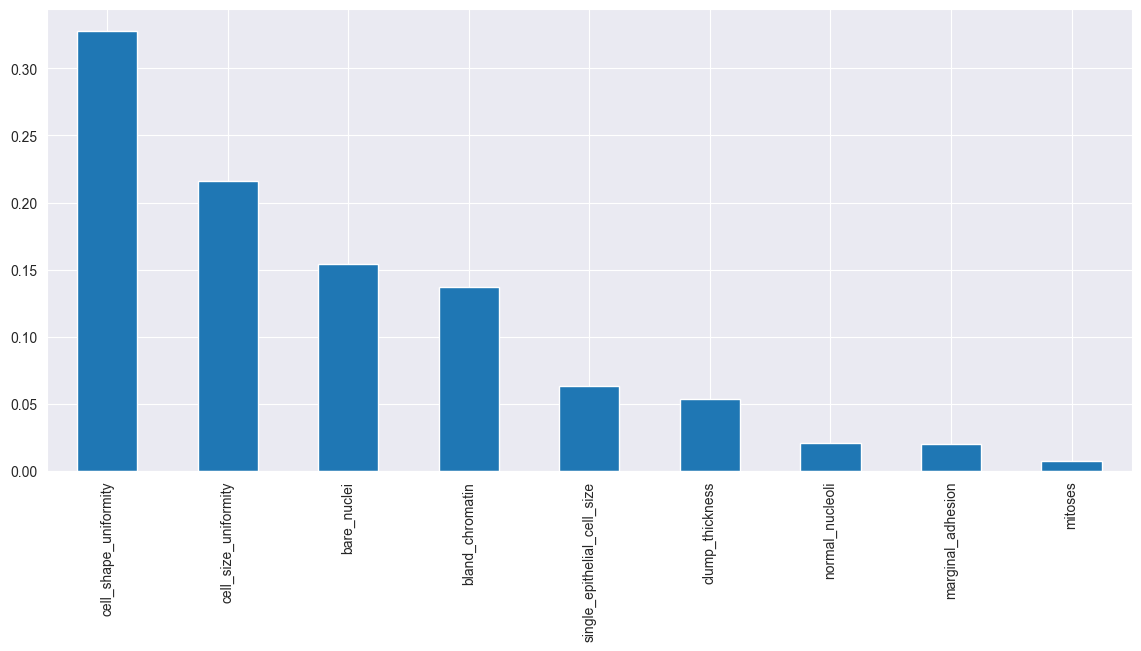

In [43]:
pd.Series(model_rf.feature_importances_,index = X.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (14,6))  


In [44]:
for i in range (2,7):                                                                  
    model = RandomForestClassifier(random_state=0,max_features=i)
    scores = cross_validate(model, X, y, scoring='precision',cv=5)
    print(i,':',np.average(scores['test_score']))

2 : 0.9033197139938715
3 : 0.8964241060265067
4 : 0.8839173405211141
5 : 0.8839173405211141
6 : 0.8840280824923212


In [45]:
rf = RandomForestClassifier(random_state=0,max_features=3)

y_pred_rf = model_rf.predict(new_obs)
print(y_pred_rf)

[0]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
